Importing Libraries for data and visulaization

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [29]:
pd.set_option('display.max_column', None)   # reading all columns
pd.set_option('display.max_colwidth', None) # reading all values in the column
pd.set_option('display.max_row', None)      # reading all rows

###  **1. This Data is Created by our team for hand letters detection, 32 classes (letters)**
---

### **2. Libraries used for this (opencv-python, mediapipe, pandas)**
- ``opencv-python`` library: for using the camera and taking the photos frame by frame for every letter
- ``mediapip``: Takes the frame created by `opencv-python` and puts 21 landmark for every hand and ubstract the landmark's coordinates (x, y, and z)
- ``pandas``: Takes the output (coordinates) from `mediapipe`, add it in a data frame with the target column (every letter in arabic), and create a .csv file from it

---
### **3.(Challenges And Insights With Data Collecting)**

- The whole landmarks(i) indecies (xi, yi, and zi) is substracted from the landmark(0) indecies (x0, y0, and z0), ***This to have one*** **Refrence Point** becuase the place of the hand is changing in every frame
- Drop the landmark(0) and it's coordinates from the data
- There is no **NULL** vlues cause we droped the samples that ``mediapipe`` library failed to upstract (no hands on the photo, or some photos with bad lighting or fiailed to detect a hand), and photos with 2 or more hands was processed
- Using encoding with ``opencv-python`` to write the target with Arabic, cause it's based on cpp
- every feature represent the distance between the landmark(i) coordinated and the landmark(0) coordinate



In [30]:
df = pd.read_csv(r"dataset/Sign_Language_dataset.csv")
df.head()

x1    y1    z1   x2    y2    z2    x3    y3    z3    x4    y4    z4    x5  \
0 0.03 -0.02 -0.02 0.04 -0.06 -0.03  0.01 -0.08 -0.04 -0.03 -0.08 -0.05  0.02   
1 0.04 -0.04 -0.02 0.05 -0.11 -0.03  0.04 -0.17 -0.04  0.01 -0.21 -0.05  0.05   
2 0.07 -0.01 -0.04 0.12 -0.07 -0.06  0.17 -0.12 -0.08  0.21 -0.15 -0.09  0.08   
3 0.02 -0.09 -0.00 0.01 -0.18 -0.01  0.01 -0.24 -0.02  0.02 -0.30 -0.04 -0.09   
4 0.02 -0.04 -0.02 0.01 -0.08 -0.03 -0.02 -0.11 -0.04 -0.05 -0.12 -0.04 -0.02   

     y5    z5    x6    y6    z6    x7    y7    z7    x8    y8    z8    x9  \
0 -0.16 -0.01  0.02 -0.22 -0.04  0.02 -0.24 -0.05  0.01 -0.22 -0.05 -0.01   
1 -0.19 -0.02  0.06 -0.28 -0.03  0.06 -0.33 -0.05  0.06 -0.38 -0.05  0.02   
2 -0.17 -0.03  0.10 -0.27 -0.07  0.10 -0.32 -0.07  0.10 -0.37 -0.09  0.04   
3 -0.17  0.01 -0.12 -0.23 -0.01 -0.13 -0.28 -0.02 -0.13 -0.31 -0.03 -0.10   
4 -0.13 -0.01 -0.04 -0.19 -0.02 -0.06 -0.22 -0.03 -0.07 -0.25 -0.04 -0.04   

     y9    z9   x10   y10   z10   x11   y11   z11   x12   y12   z12   x13  \
0 -0.15 -0.01 -0.05 -0.21 -0.04 -0.05 -0.22 -0.05 -0.05 -0.21 -0.04 -0.04   
1 -0.19 -0.02  0.01 -0.29 -0.04  0.01 -0.35 -0.06  0.01 -0.40 -0.07 -0.01   
2 -0.17 -0.03  0.04 -0.22 -0.07  0.05 -0.14 -0.08  0.05 -0.12 -0.07 -0.01   
3 -0.15 -0.00 -0.08 -0.23 -0.03 -0.04 -0.20 -0.04 -0.02 -0.17 -0.04 -0.11   
4 -0.12 -0.01 -0.07 -0.15 -0.03 -0.07 -0.12 -0.04 -0.05 -0.10 -0.04 -0.06   

    y13   z13   x14   y14   z14   x15   y15   z15   x16   y16   z16   x17  \
0 -0.12 -0.02 -0.04 -0.12 -0.05 -0.03 -0.10 -0.05 -0.02 -0.08 -0.04 -0.05   
1 -0.17 -0.03 -0.01 -0.23 -0.06  0.00 -0.20 -0.06  0.02 -0.17 -0.06 -0.04   
2 -0.15 -0.03  0.00 -0.18 -0.08  0.01 -0.12 -0.06  0.01 -0.10 -0.04 -0.05   
3 -0.13 -0.02 -0.07 -0.20 -0.05 -0.03 -0.15 -0.05 -0.04 -0.11 -0.03 -0.11   
4 -0.09 -0.00 -0.09 -0.12 -0.02 -0.08 -0.10 -0.03 -0.07 -0.08 -0.02 -0.07   

    y17   z17   x18   y18   z18   x19   y19   z19   x20   y20   z20 label  
0 -0.08 -0.02 -0.04 -0.08 -0.04 -0.03 -0.06 -0.04 -0.02 -0.05 -0.04     ة  
1 -0.14 -0.03 -0.03 -0.18 -0.06 -0.02 -0.17 -0.06 -0.01 -0.15 -0.06     ت  
2 -0.14 -0.03 -0.04 -0.17 -0.06 -0.03 -0.12 -0.05 -0.03 -0.10 -0.03     ل  
3 -0.11 -0.04 -0.07 -0.17 -0.06 -0.04 -0.14 -0.05 -0.05 -0.10 -0.03     ن  
4 -0.06 -0.00 -0.09 -0.09 -0.02 -0.09 -0.08 -0.02 -0.08 -0.07 -0.01     ب

In [31]:
df.shape

(7218, 61)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7218 entries, 0 to 7217
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      7218 non-null   float64
 1   y1      7218 non-null   float64
 2   z1      7218 non-null   float64
 3   x2      7218 non-null   float64
 4   y2      7218 non-null   float64
 5   z2      7218 non-null   float64
 6   x3      7218 non-null   float64
 7   y3      7218 non-null   float64
 8   z3      7218 non-null   float64
 9   x4      7218 non-null   float64
 10  y4      7218 non-null   float64
 11  z4      7218 non-null   float64
 12  x5      7218 non-null   float64
 13  y5      7218 non-null   float64
 14  z5      7218 non-null   float64
 15  x6      7218 non-null   float64
 16  y6      7218 non-null   float64
 17  z6      7218 non-null   float64
 18  x7      7218 non-null   float64
 19  y7      7218 non-null   float64
 20  z7      7218 non-null   float64
 21  x8      7218 non-null   float64
 22  

- The data has 61 column (60 column for the data), and 1 for the label
- The has no catigorical columns all the data is numerical except the targe column (NO need for encoding)
- The data has no NULL values


In [33]:
df.isnull().sum()

x1       0
y1       0
z1       0
x2       0
y2       0
z2       0
x3       0
y3       0
z3       0
x4       0
y4       0
z4       0
x5       0
y5       0
z5       0
x6       0
y6       0
z6       0
x7       0
y7       0
z7       0
x8       0
y8       0
z8       0
x9       0
y9       0
z9       0
x10      0
y10      0
z10      0
x11      0
y11      0
z11      0
x12      0
y12      0
z12      0
x13      0
y13      0
z13      0
x14      0
y14      0
z14      0
x15      0
y15      0
z15      0
x16      0
y16      0
z16      0
x17      0
y17      0
z17      0
x18      0
y18      0
z18      0
x19      0
y19      0
z19      0
x20      0
y20      0
z20      0
label    0
dtype: int64

In [34]:
df.describe()

x1      y1      z1      x2      y2      z2      x3      y3      z3  \
count 7218.00 7218.00 7218.00 7218.00 7218.00 7218.00 7218.00 7218.00 7218.00   
mean     0.05   -0.05   -0.02    0.08   -0.13   -0.03    0.10   -0.20   -0.05   
std      0.04    0.03    0.03    0.06    0.06    0.03    0.08    0.09    0.04   
min     -0.18   -0.21   -0.16   -0.26   -0.44   -0.34   -0.32   -0.61   -0.50   
25%      0.04   -0.07   -0.03    0.06   -0.17   -0.05    0.06   -0.25   -0.06   
50%      0.05   -0.05   -0.02    0.09   -0.13   -0.03    0.10   -0.19   -0.04   
75%      0.07   -0.03   -0.00    0.12   -0.09   -0.01    0.15   -0.14   -0.03   
max      0.17    0.04    0.09    0.26    0.08    0.13    0.36    0.11    0.19   

           x4      y4      z4      x5      y5      z5      x6      y6      z6  \
count 7218.00 7218.00 7218.00 7218.00 7218.00 7218.00 7218.00 7218.00 7218.00   
mean     0.10   -0.24   -0.06    0.04   -0.23   -0.02    0.07   -0.30   -0.05   
std      0.11    0.11    0.04    0.06    0.07    0.03    0.09    0.10    0.04   
min     -0.40   -0.76   -0.66   -0.20   -0.47   -0.48   -0.31   -0.64   -0.69   
25%      0.03   -0.31   -0.08    0.02   -0.28   -0.03    0.04   -0.37   -0.06   
50%      0.10   -0.24   -0.05    0.05   -0.23   -0.01    0.07   -0.30   -0.04   
75%      0.17   -0.17   -0.03    0.08   -0.17   -0.00    0.12   -0.22   -0.02   
max      0.46    0.14    0.27    0.29    0.07    0.15    0.37    0.11    0.24   

           x7      y7      z7      x8      y8      z8      x9      y9      z9  \
count 7218.00 7218.00 7218.00 7218.00 7218.00 7218.00 7218.00 7218.00 7218.00   
mean     0.09   -0.32   -0.06    0.10   -0.33   -0.07    0.02   -0.22   -0.03   
std      0.10    0.13    0.05    0.12    0.16    0.05    0.06    0.07    0.03   
min     -0.41   -0.77   -0.82   -0.50   -0.89   -0.89   -0.24   -0.46   -0.48   
25%      0.05   -0.40   -0.09    0.05   -0.44   -0.10   -0.01   -0.27   -0.04   
50%      0.09   -0.30   -0.06    0.09   -0.31   -0.07    0.02   -0.22   -0.02   
75%      0.14   -0.23   -0.04    0.16   -0.21   -0.04    0.05   -0.17   -0.01   
max      0.48    0.13    0.28    0.60    0.15    0.30    0.25    0.07    0.17   

          x10     y10     z10     x11     y11     z11     x12     y12     z12  \
count 7218.00 7218.00 7218.00 7218.00 7218.00 7218.00 7218.00 7218.00 7218.00   
mean     0.05   -0.29   -0.06    0.07   -0.27   -0.07    0.08   -0.26   -0.07   
std      0.10    0.10    0.05    0.11    0.14    0.05    0.12    0.17    0.05   
min     -0.40   -0.66   -0.76   -0.52   -0.80   -0.89   -0.62   -0.92   -0.97   
25%      0.00   -0.36   -0.08    0.01   -0.34   -0.09    0.02   -0.34   -0.09   
50%      0.04   -0.28   -0.05    0.06   -0.25   -0.06    0.06   -0.21   -0.06   
75%      0.10   -0.21   -0.03    0.13   -0.17   -0.04    0.14   -0.14   -0.04   
max      0.42    0.11    0.27    0.55    0.13    0.29    0.70    0.16    0.29   

          x13     y13     z13     x14     y14     z14     x15     y15     z15  \
count 7218.00 7218.00 7218.00 7218.00 7218.00 7218.00 7218.00 7218.00 7218.00   
mean    -0.01   -0.20   -0.04    0.03   -0.24   -0.07    0.05   -0.21   -0.07   
std      0.06    0.07    0.04    0.10    0.11    0.05    0.09    0.13    0.05   
min     -0.27   -0.44   -0.48   -0.39   -0.63   -0.72   -0.28   -0.75   -0.84   
25%     -0.04   -0.25   -0.05   -0.03   -0.31   -0.10   -0.01   -0.26   -0.09   
50%     -0.01   -0.20   -0.03    0.01   -0.24   -0.07    0.02   -0.18   -0.06   
75%      0.02   -0.15   -0.02    0.10   -0.17   -0.04    0.11   -0.13   -0.04   
max      0.29    0.07    0.19    0.42    0.11    0.29    0.40    0.13    0.29   

          x16     y16     z16     x17     y17     z17     x18     y18     z18  \
count 7218.00 7218.00 7218.00 7218.00 7218.00 7218.00 7218.00 7218.00 7218.00   
mean     0.05   -0.19   -0.06   -0.02   -0.16   -0.05    0.01   -0.20   -0.07   
std      0.09    0.15    0.05    0.08    0.08    0.04    0.11    0.10    0.05   
min     -0.25   -0.85   -0.90   -0.27

- The scale of the data is from 1 to -1 so no need for scalling

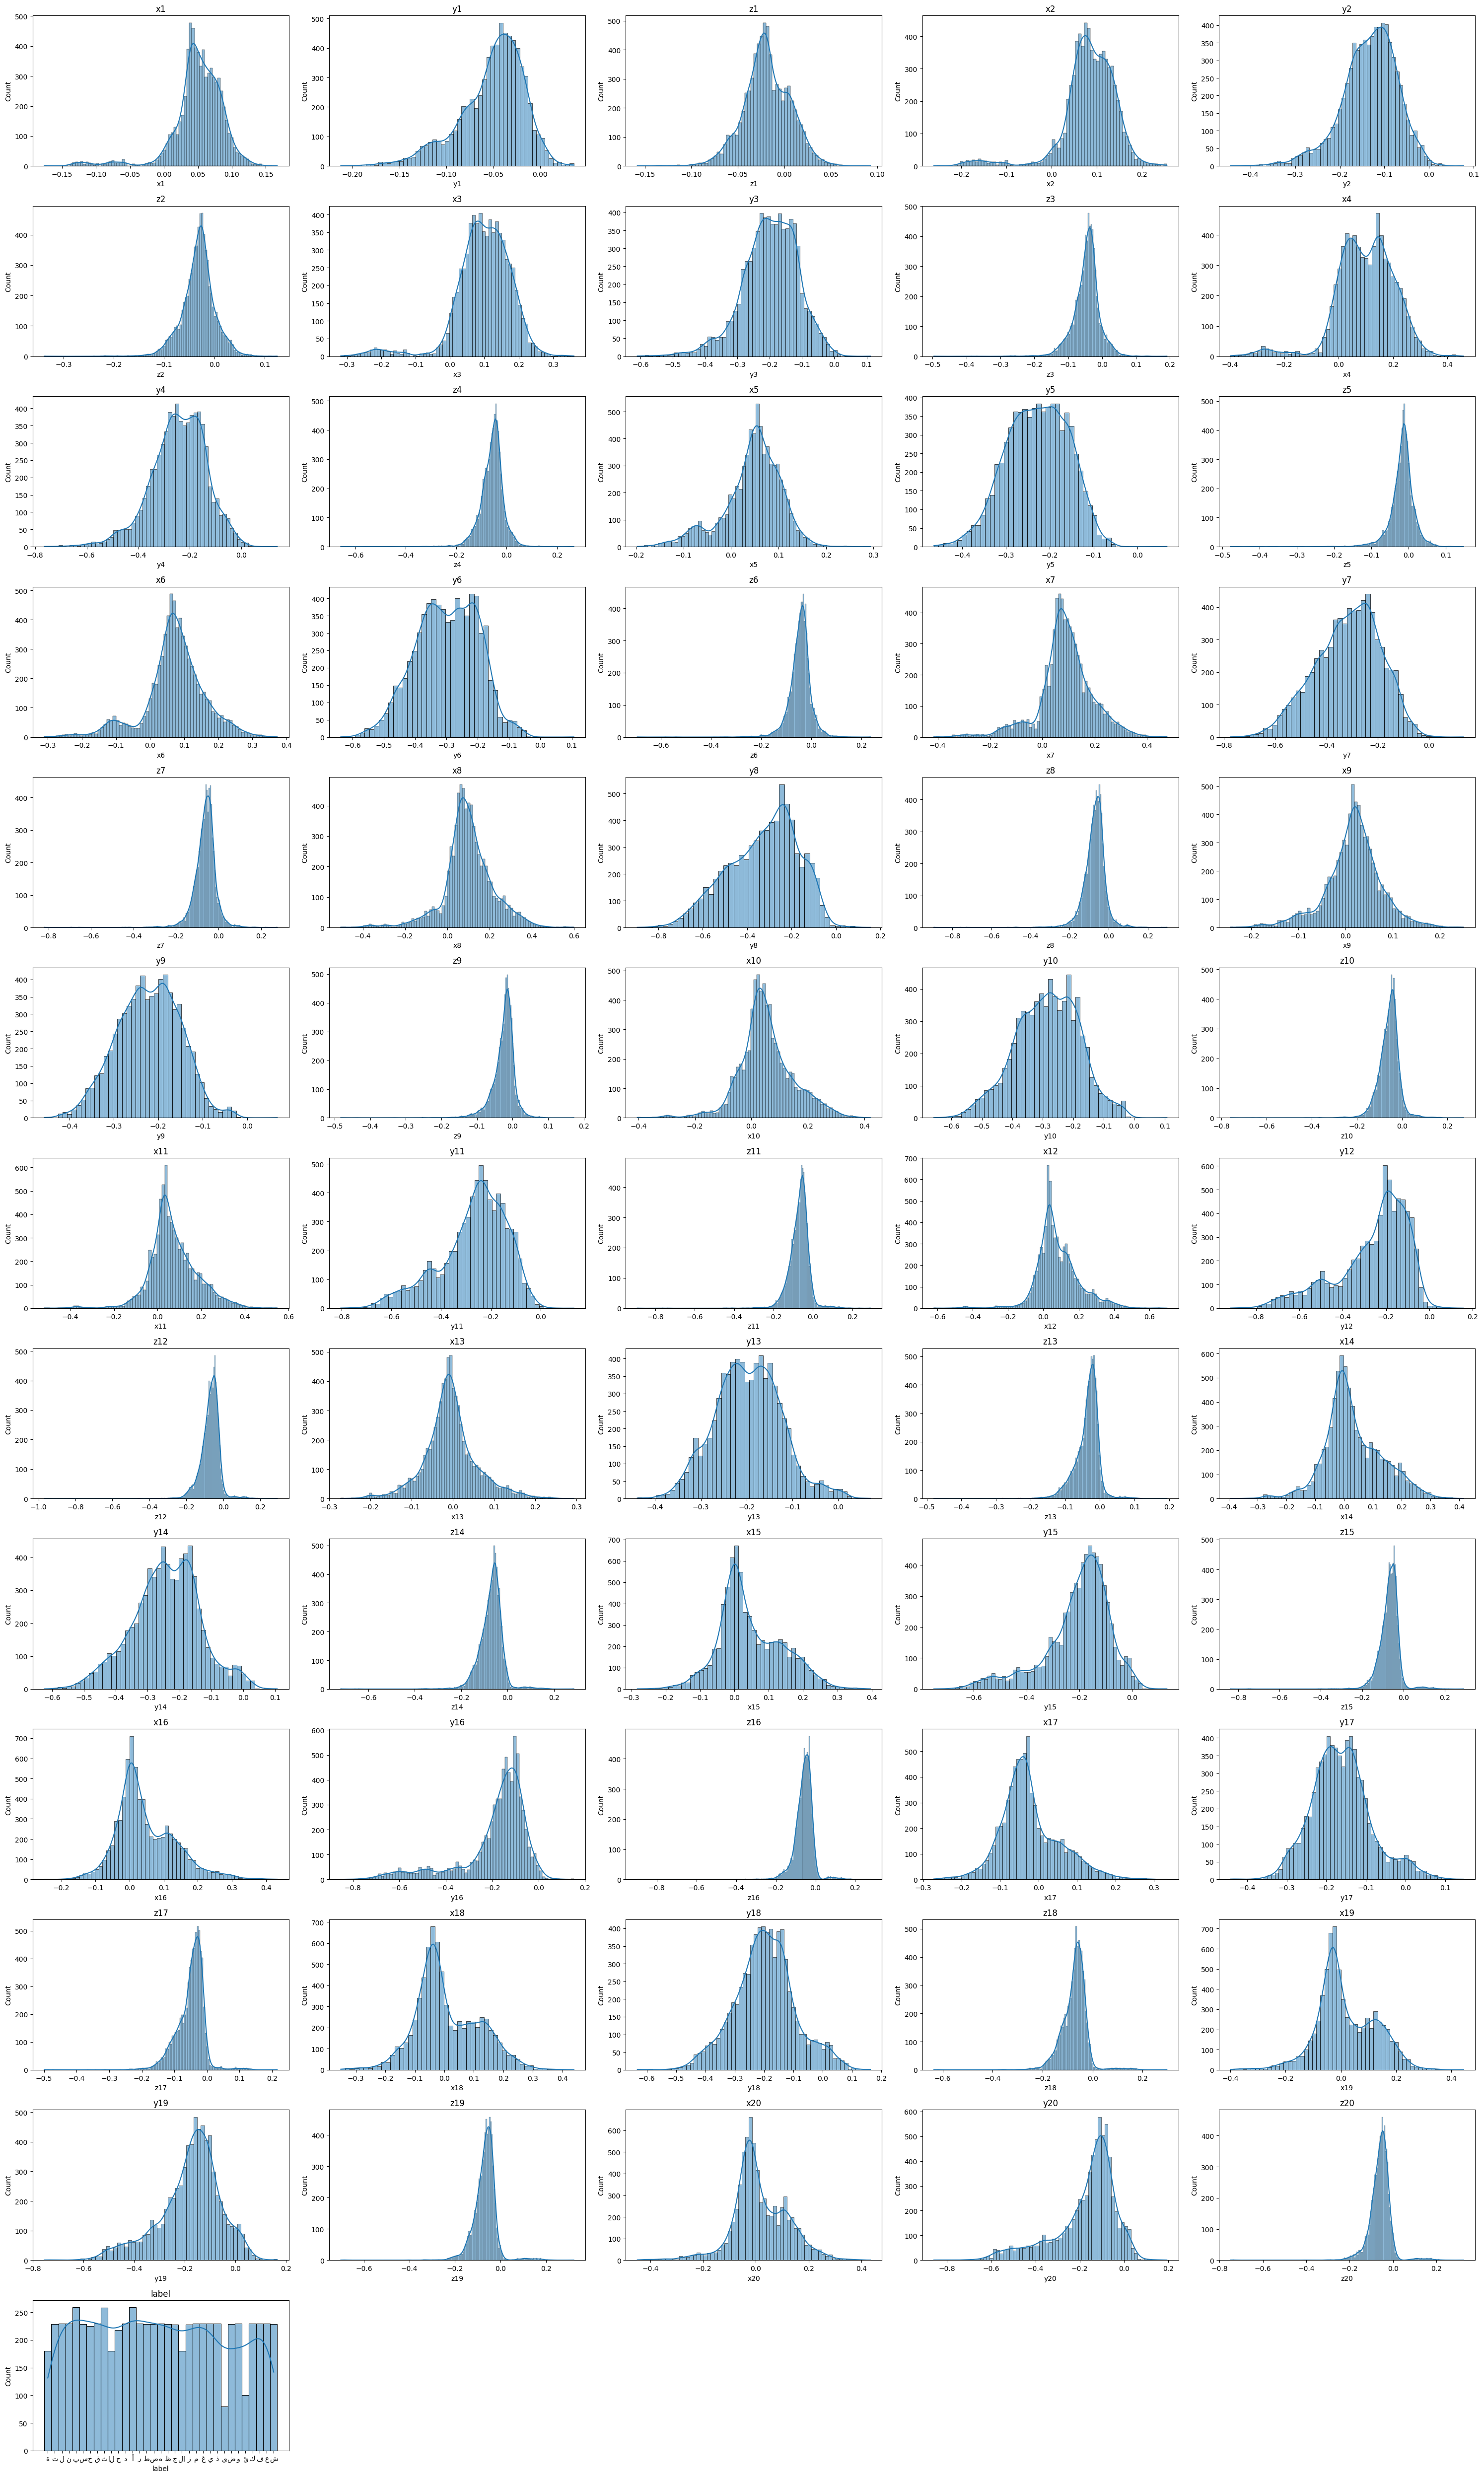

In [35]:
plt.figure(figsize= (30, 50))

for index, col in enumerate(df.columns, 1):
    plt.subplot(13, 5, index)
    sns.histplot(df[col], kde= True)
    plt.title(col)

plt.tight_layout()
plt.show()


- Some columns a littel bit skewed but not extreme
- The targe column has some classes have little examplese from another calsses (non-balanced data), So may need to use weights of the classes

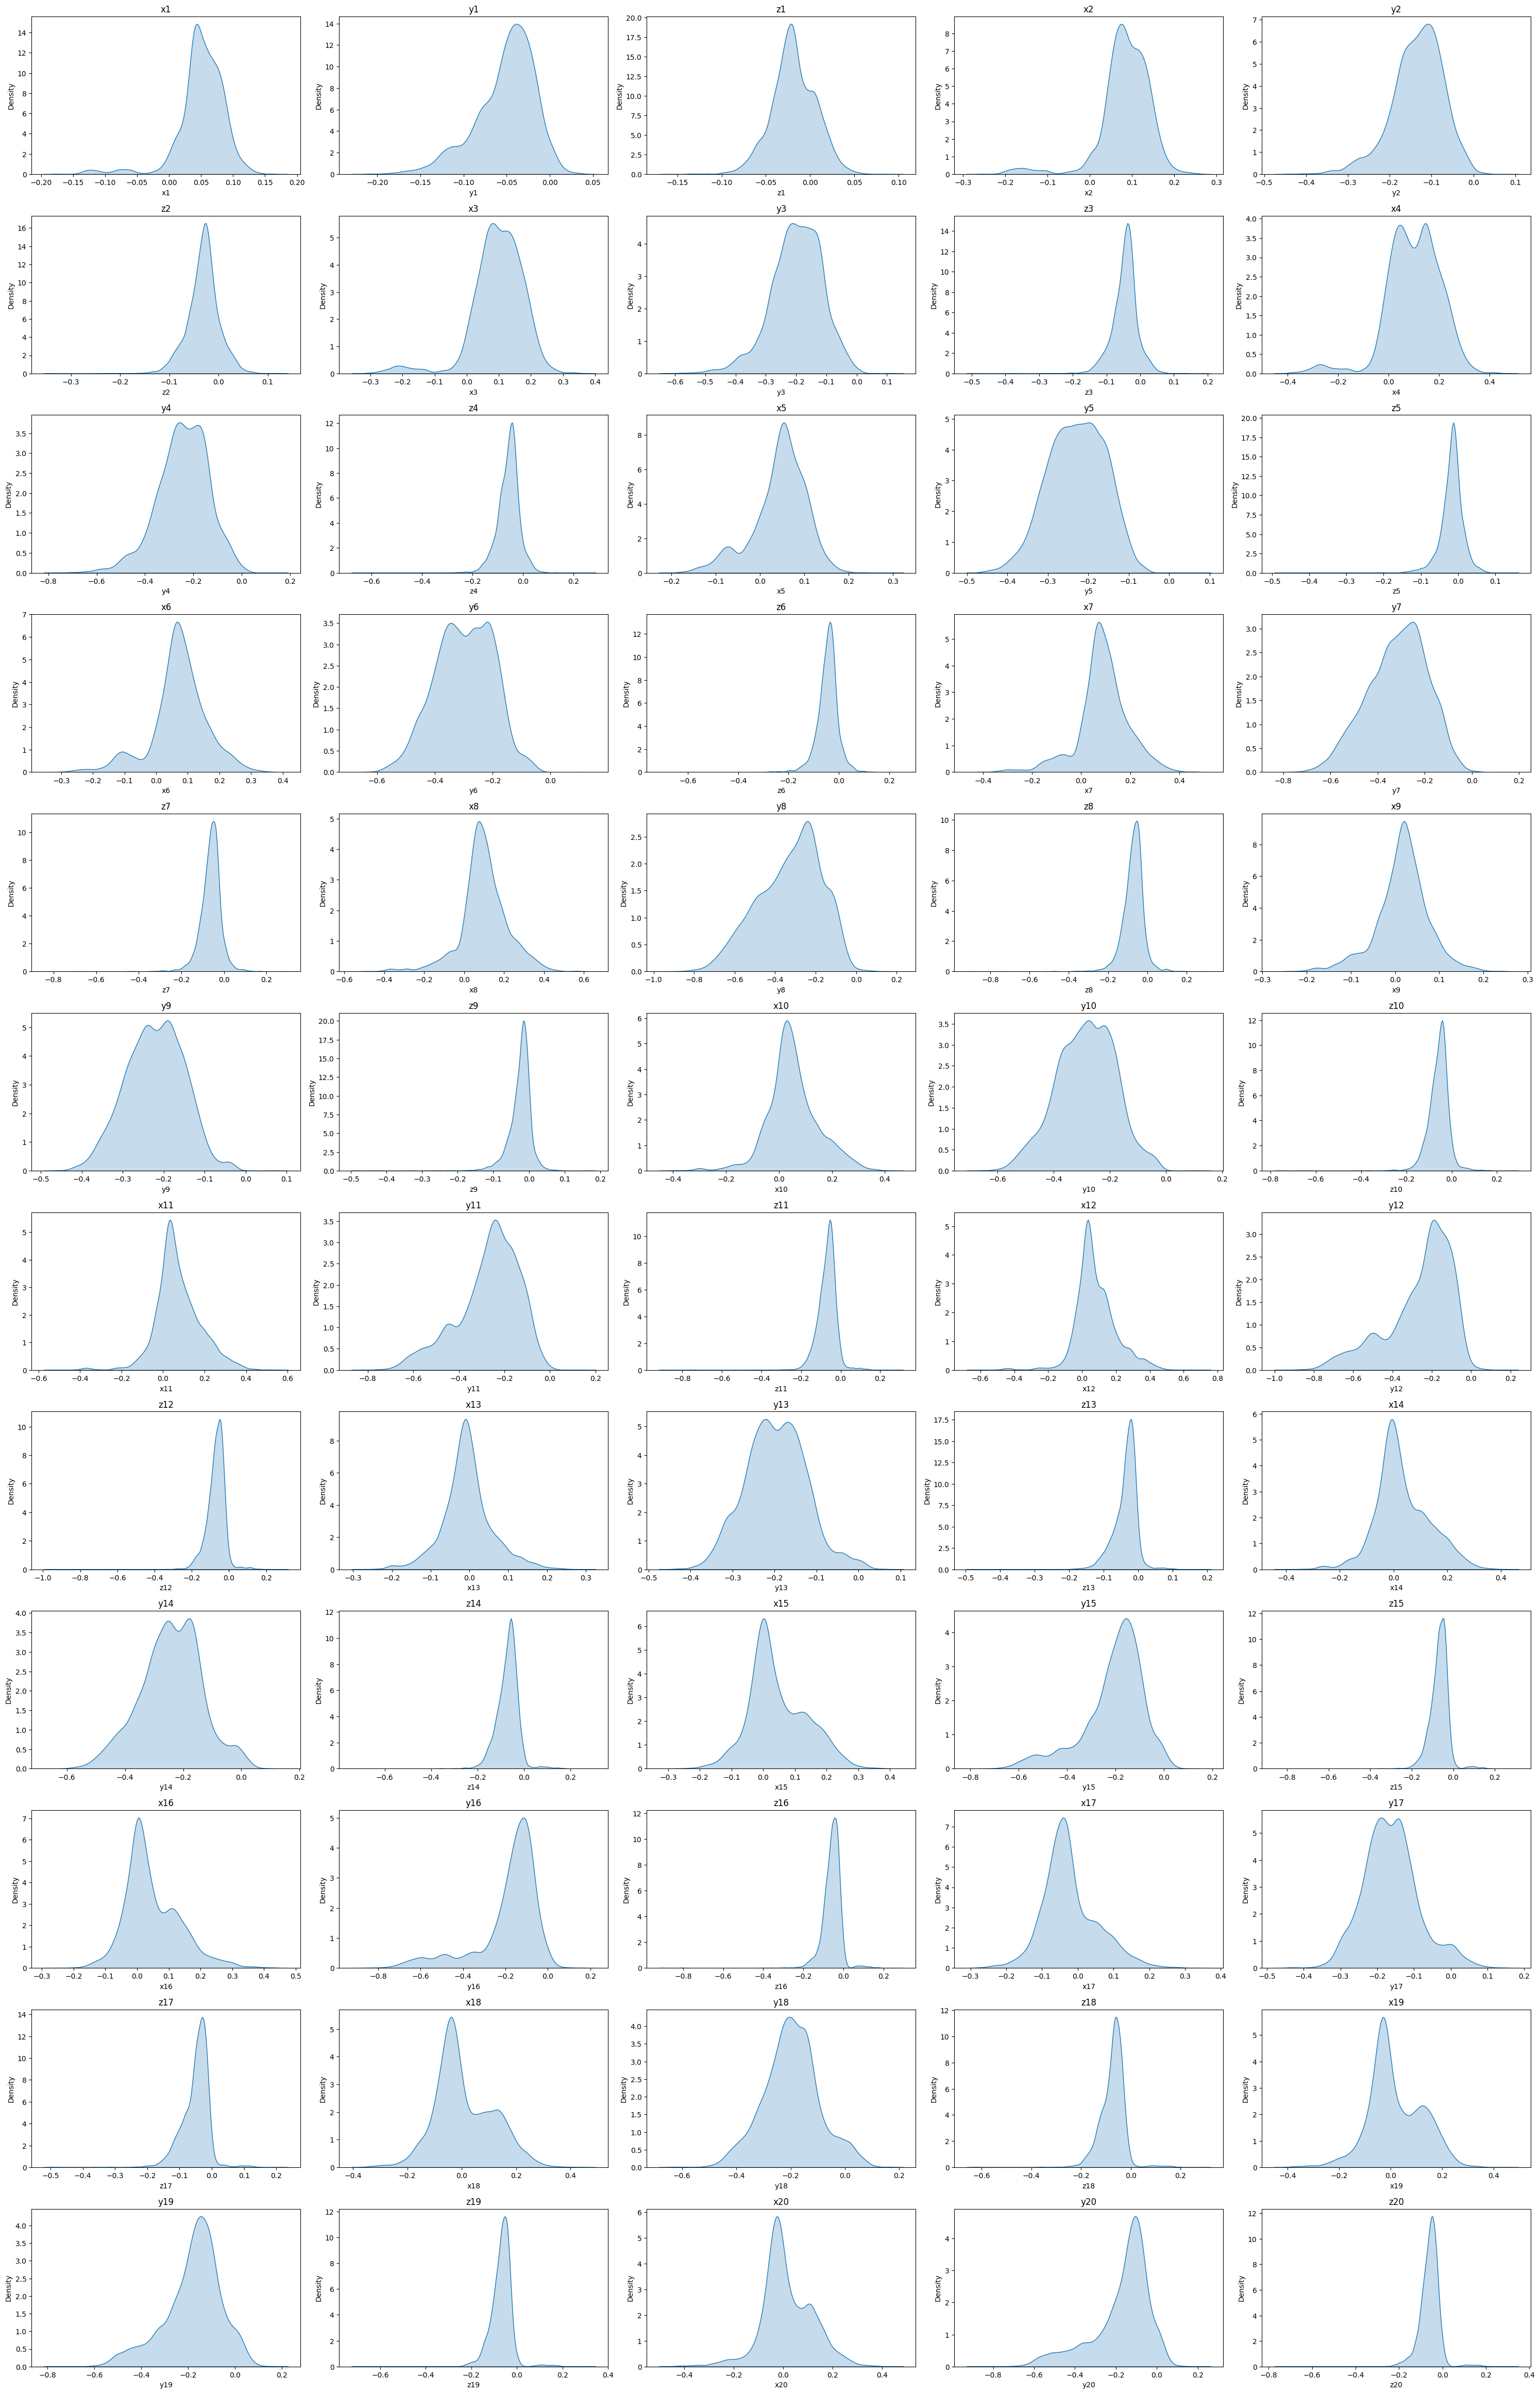

In [36]:
plt.figure(figsize= (30, 50))

for index, col in enumerate(df.columns[: -1], 1):
    plt.subplot(13, 5, index)
    sns.kdeplot(df[col], fill= True)
    plt.title(col)

plt.tight_layout()
plt.show()

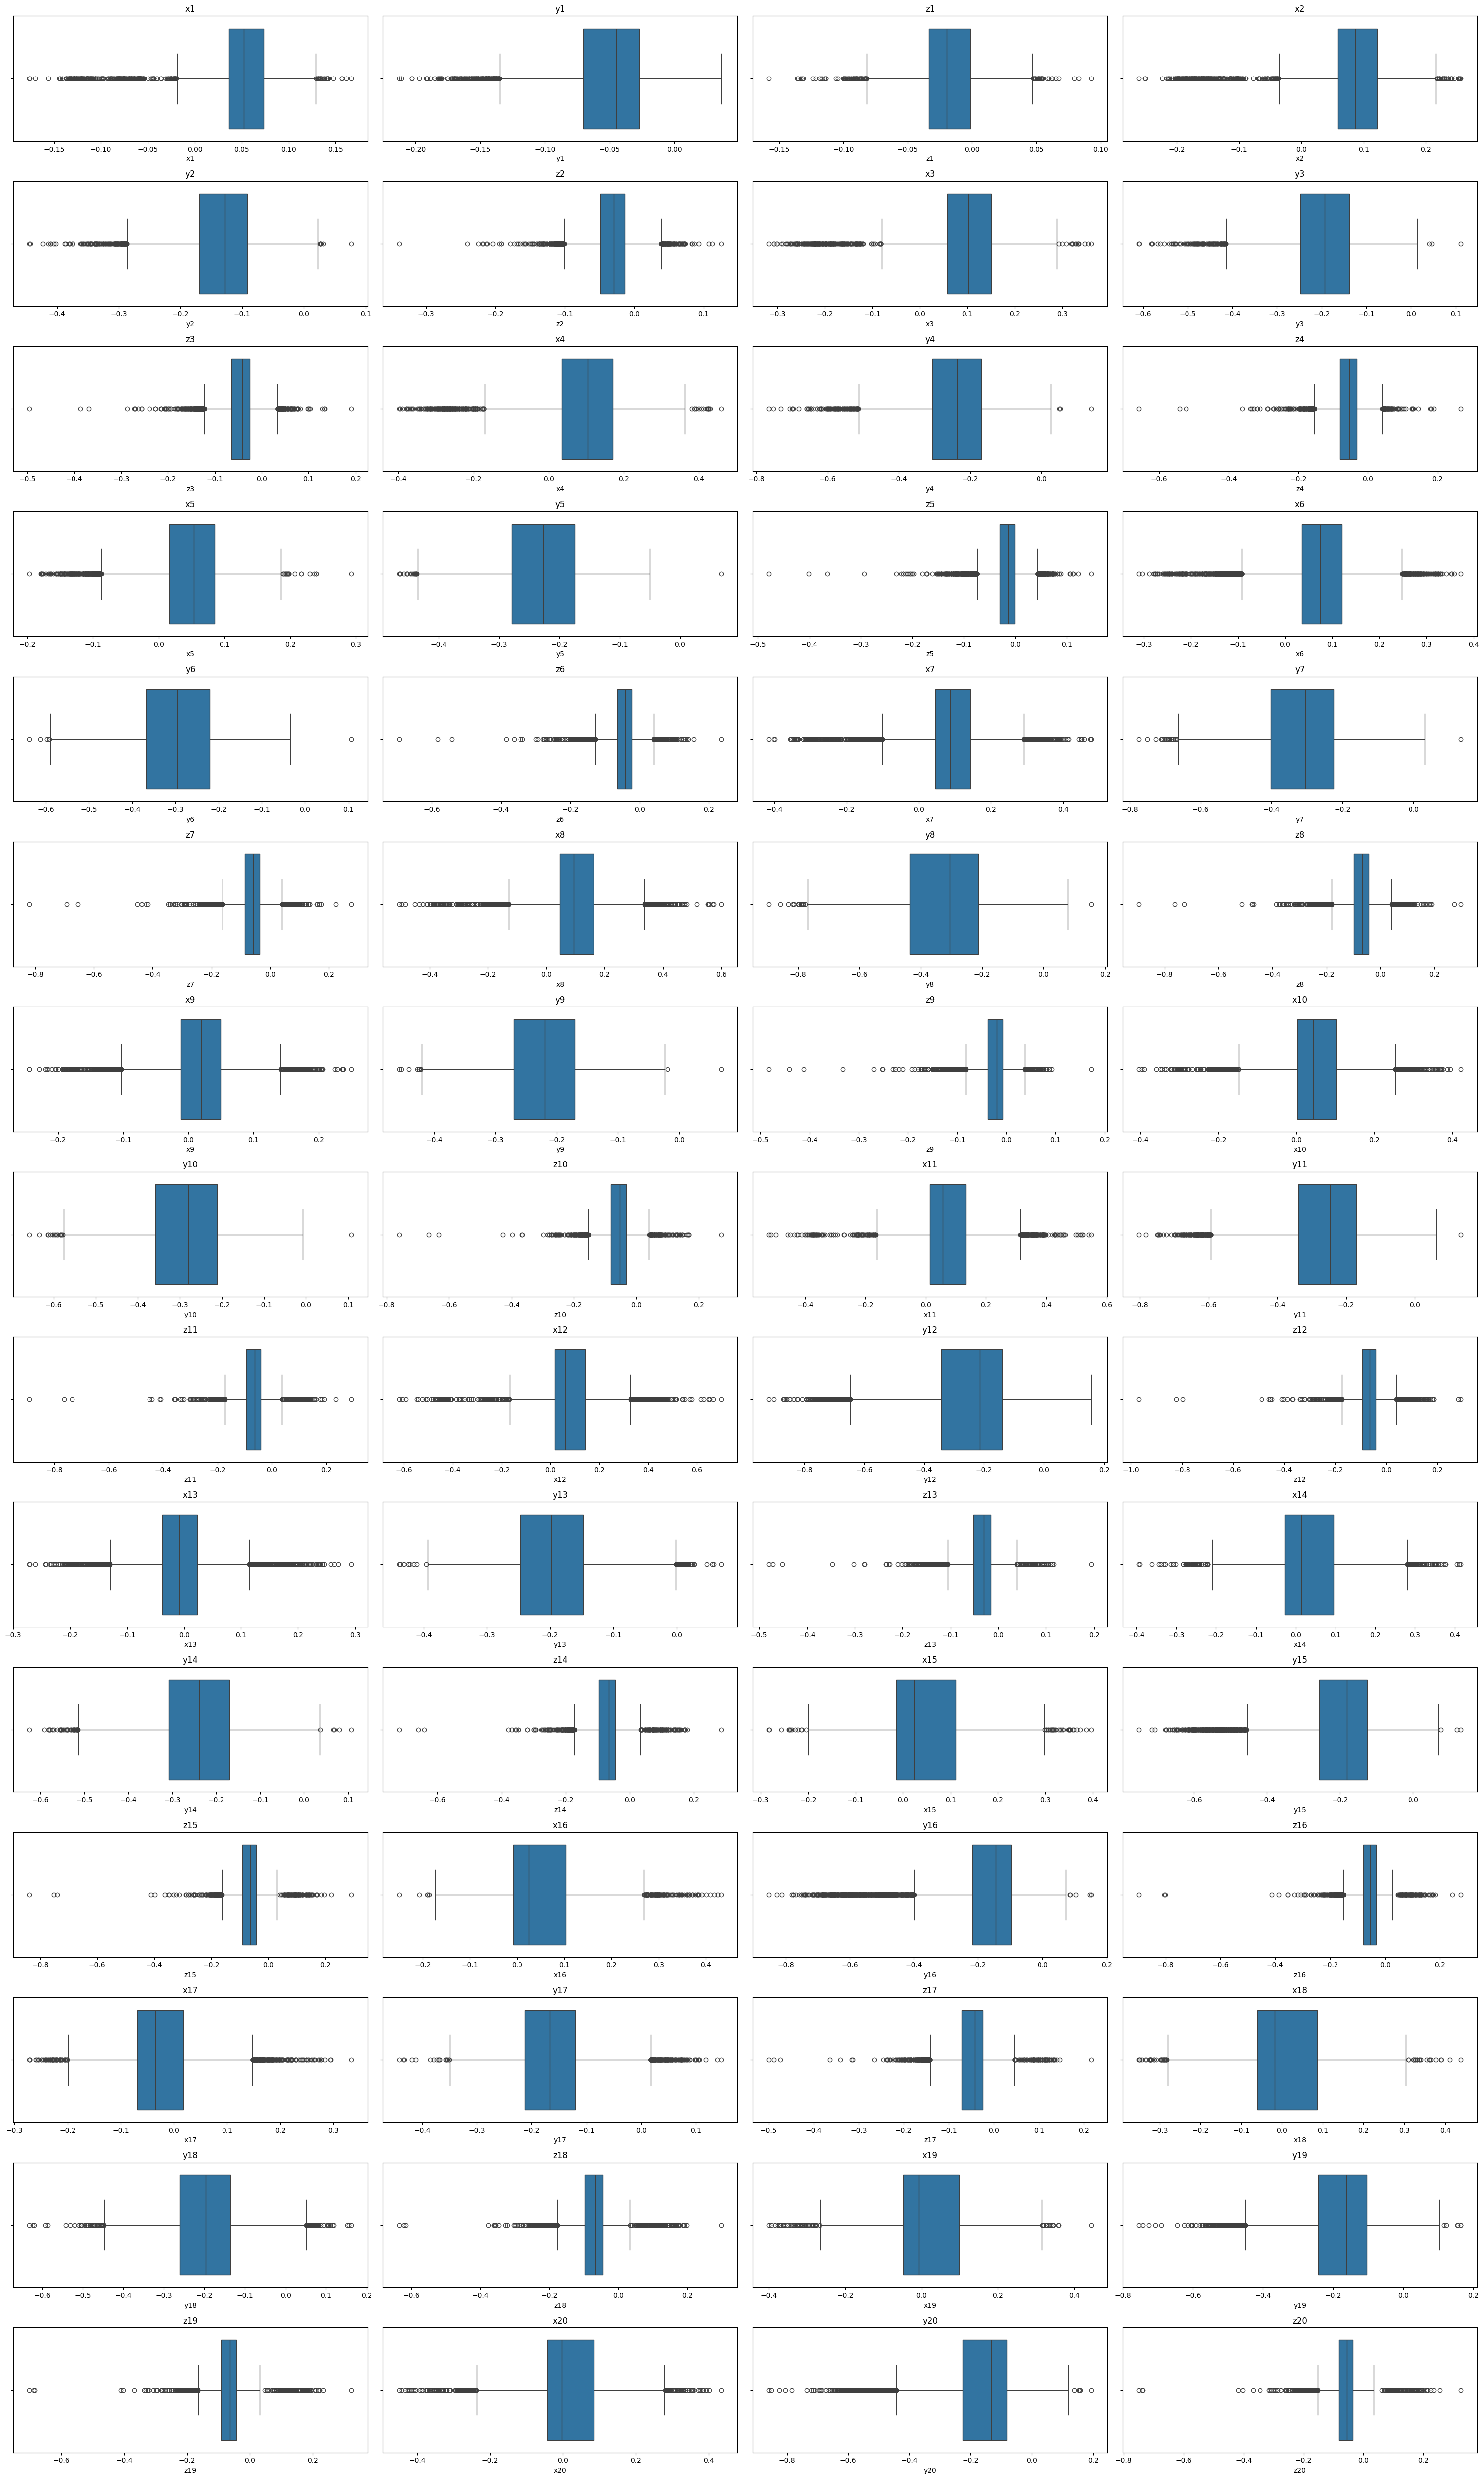

In [37]:
plt.figure(figsize= (30, 50))

for index, col in enumerate(df.columns[: -1], 1):
    plt.subplot(15, 4, index)
    sns.boxplot(x= df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

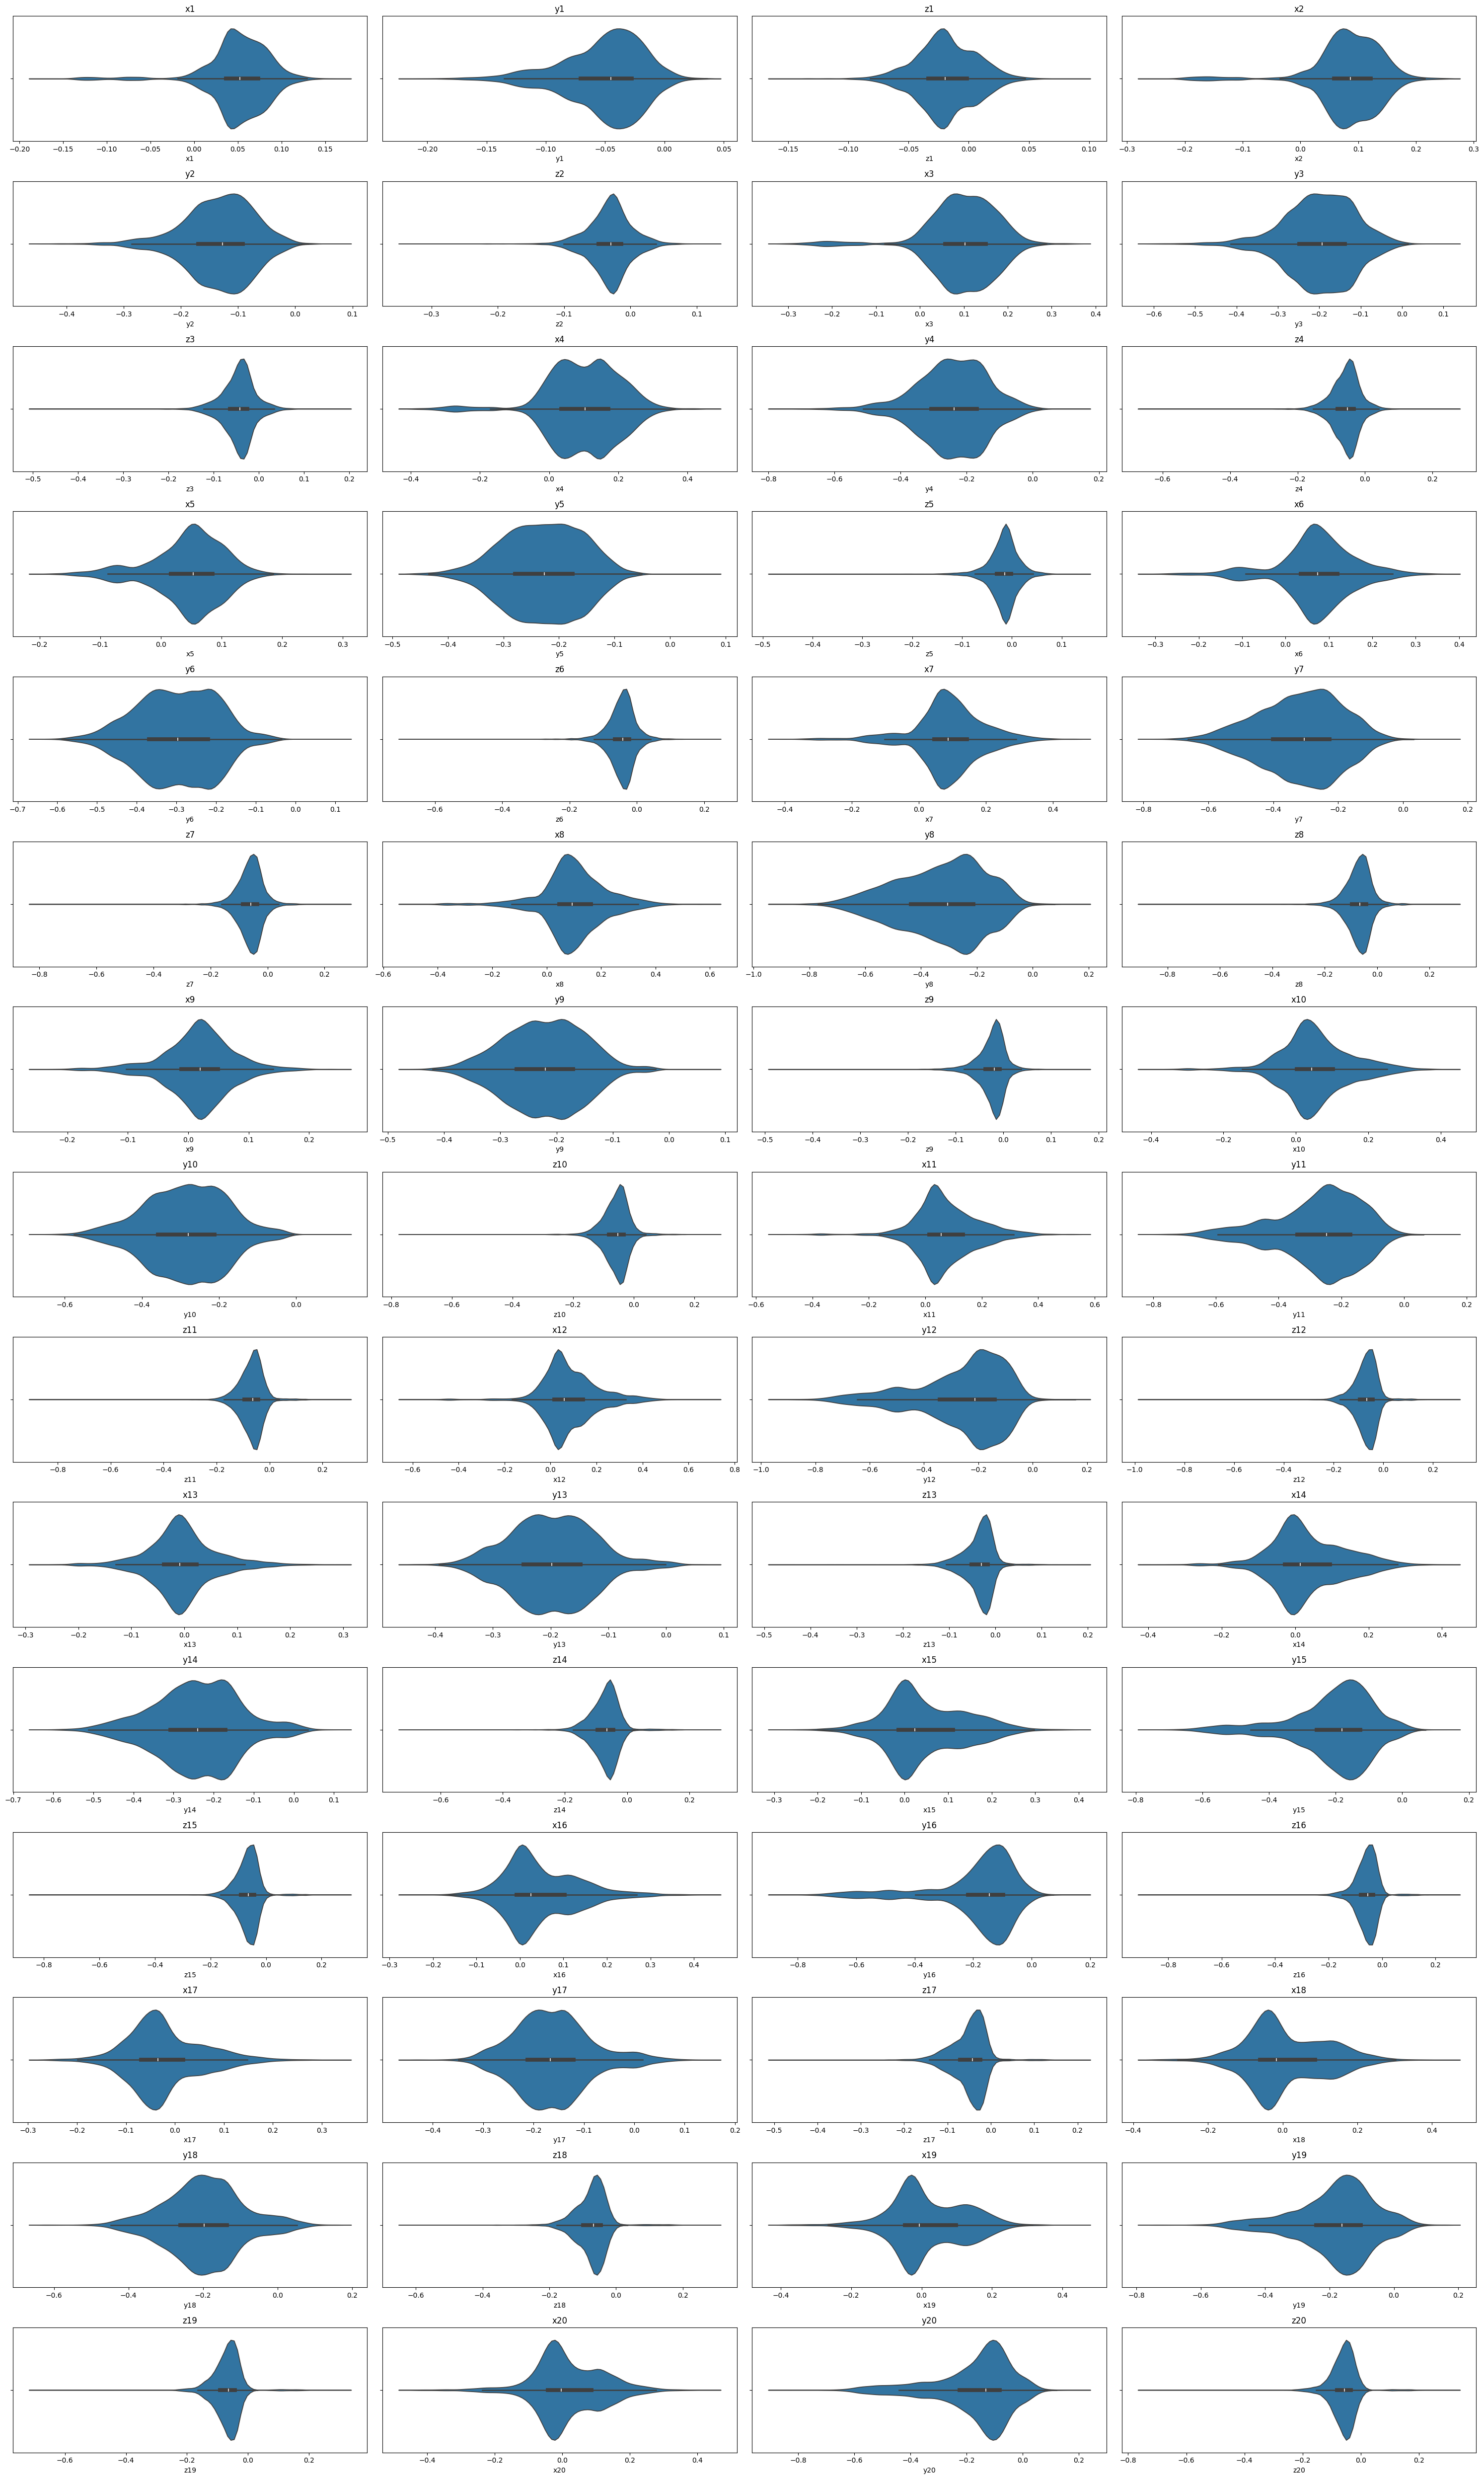

In [38]:
plt.figure(figsize= (30, 50))

for index, col in enumerate(df.columns[: -1], 1):
    plt.subplot(15, 4, index)
    sns.violinplot(x= df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

- The data has a lot of outlieres about 3-8% for every column (This is too much)
- In This data no need for hadle this because the outlaries is not extreme, ***and it represent the difference in the samples and hands and photos***
- We will use some models that don't be effected by outlries like (random forest, SVC,......)

In [39]:
Q1 = df.quantile(0.25, numeric_only= True)
Q3 = df.quantile(0.75, numeric_only= True)
IQR = Q3 - Q1

for col in df.select_dtypes(include= np.number).columns:
  lower_limit = Q1[col] - 1.5 * IQR[col]
  upper_limit = Q3[col] + 1.5 * IQR[col]
  filter = (df[col] < lower_limit) | (df[col] > upper_limit)

  outliers = df[filter]

  if not outliers.empty:
    outliers_count = len(outliers)
    outliers_percentage = (outliers_count / len(df)) * 100
    display(f'Outliers in {col}: {outliers_count} ({outliers_percentage:.2f}%')


'Outliers in x1: 298 (4.13%'

'Outliers in y1: 161 (2.23%'

'Outliers in z1: 91 (1.26%'

'Outliers in x2: 297 (4.11%'

'Outliers in y2: 154 (2.13%'

'Outliers in z2: 278 (3.85%'

'Outliers in x3: 260 (3.60%'

'Outliers in y3: 110 (1.52%'

'Outliers in z3: 345 (4.78%'

'Outliers in x4: 218 (3.02%'

'Outliers in y4: 106 (1.47%'

'Outliers in z4: 249 (3.45%'

'Outliers in x5: 290 (4.02%'

'Outliers in y5: 18 (0.25%'

'Outliers in z5: 438 (6.07%'

'Outliers in x6: 618 (8.56%'

'Outliers in y6: 5 (0.07%'

'Outliers in z6: 366 (5.07%'

'Outliers in x7: 567 (7.86%'

'Outliers in y7: 22 (0.30%'

'Outliers in z7: 315 (4.36%'

'Outliers in x8: 469 (6.50%'

'Outliers in y8: 17 (0.24%'

'Outliers in z8: 303 (4.20%'

'Outliers in x9: 417 (5.78%'

'Outliers in y9: 11 (0.15%'

'Outliers in z9: 407 (5.64%'

'Outliers in x10: 378 (5.24%'

'Outliers in y10: 16 (0.22%'

'Outliers in z10: 270 (3.74%'

'Outliers in x11: 286 (3.96%'

'Outliers in y11: 182 (2.52%'

'Outliers in z11: 274 (3.80%'

'Outliers in x12: 417 (5.78%'

'Outliers in y12: 248 (3.44%'

'Outliers in z12: 336 (4.66%'

'Outliers in x13: 540 (7.48%'

'Outliers in y13: 64 (0.89%'

'Outliers in z13: 354 (4.90%'

'Outliers in x14: 139 (1.93%'

'Outliers in y14: 47 (0.65%'

'Outliers in z14: 262 (3.63%'

'Outliers in x15: 41 (0.57%'

'Outliers in y15: 420 (5.82%'

'Outliers in z15: 289 (4.00%'

'Outliers in x16: 141 (1.95%'

'Outliers in y16: 755 (10.46%'

'Outliers in z16: 333 (4.61%'

'Outliers in x17: 257 (3.56%'

'Outliers in y17: 178 (2.47%'

'Outliers in z17: 266 (3.69%'

'Outliers in x18: 52 (0.72%'

'Outliers in y18: 133 (1.84%'

'Outliers in z18: 293 (4.06%'

'Outliers in x19: 62 (0.86%'

'Outliers in y19: 282 (3.91%'

'Outliers in z19: 300 (4.16%'

'Outliers in x20: 174 (2.41%'

'Outliers in y20: 513 (7.11%'

'Outliers in z20: 346 (4.79%'

The Percentage for every column outliers (it's too much)

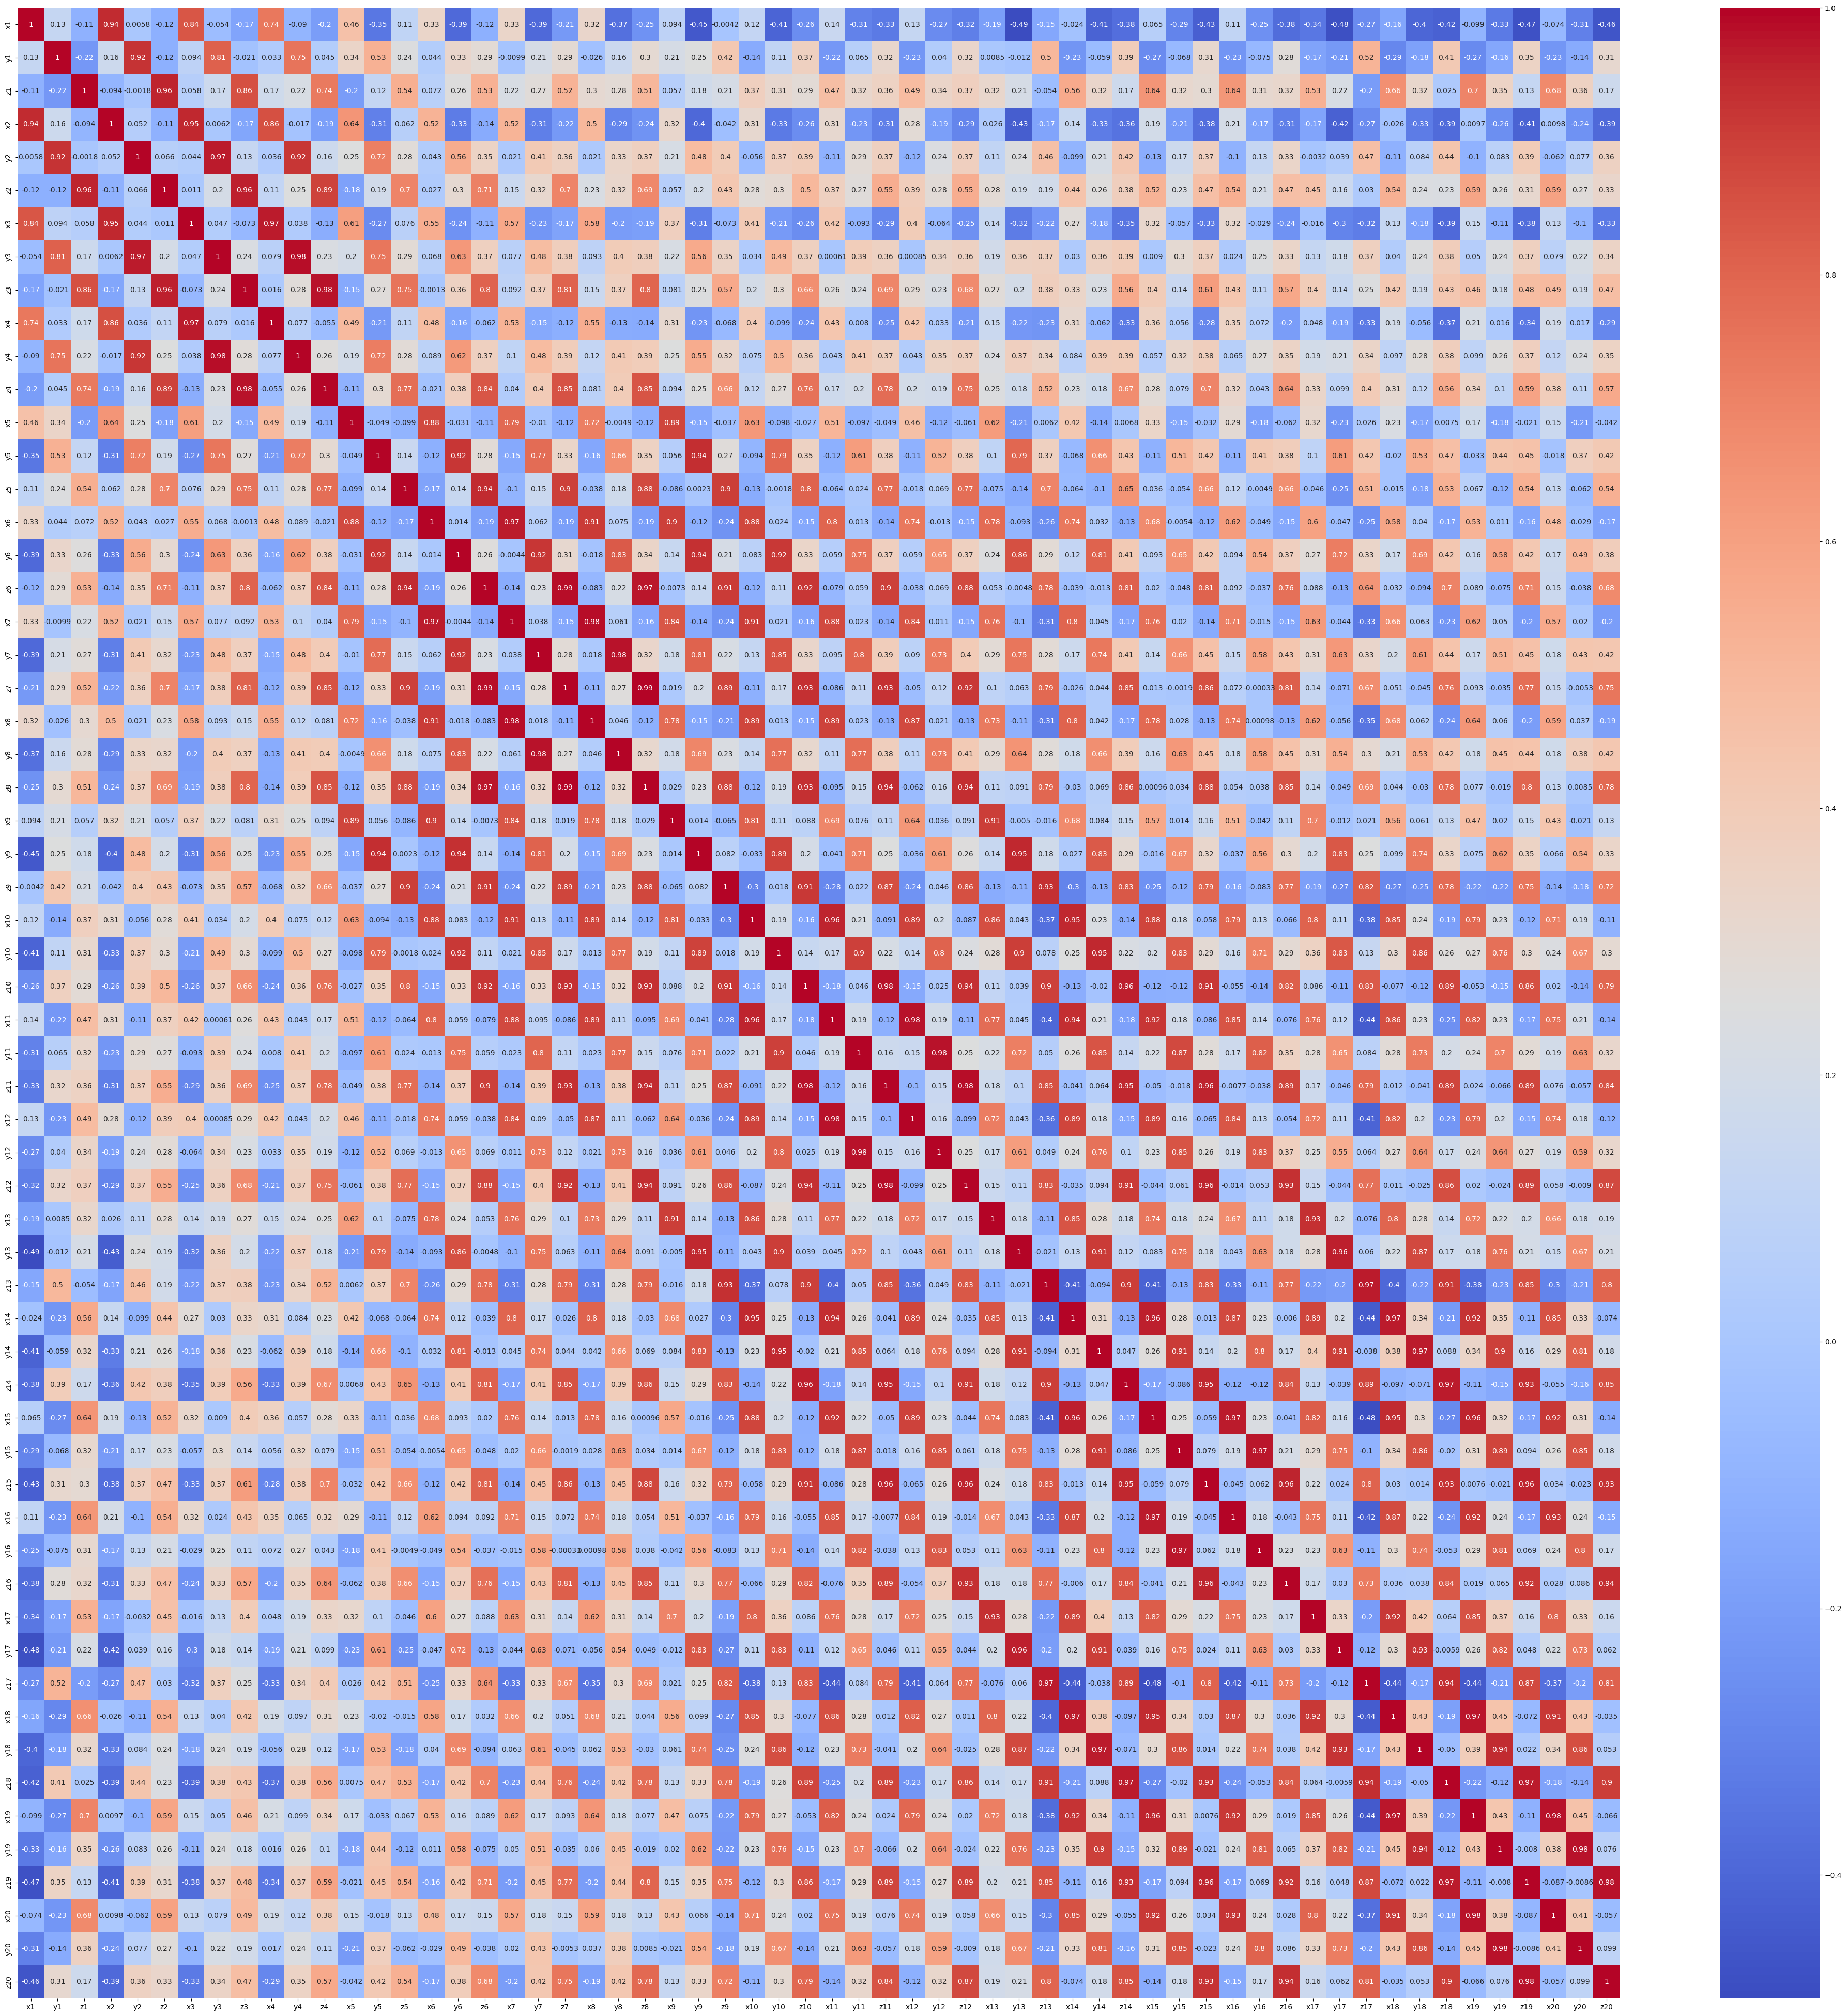

In [40]:
corr_matrix = df.corr(numeric_only = True)

plt.figure(figsize= (50, 50))
sns.heatmap(corr_matrix, annot= True, cmap= 'coolwarm')
plt.show()

- The Correleation Matrix for the relationship between the features
- There is so many features has big simelarity, (but this here is not a problem)

In [41]:
# Separating the target from the features
X = df.drop(columns=['label'])
y = df['label']


In [42]:
from sklearn.model_selection import train_test_split

# Splitting the data for training and testing the model in lazy predict
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
# Using LazyPredict to see the best models for the problem
from lazypredict.Supervised import LazyClassifier

# train, test, and models accuracy with lazy predict
clf = LazyClassifier(verbose= 1,ignore_warnings=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# sorting models by accuracy
models_sorted = models.sort_values(by="Accuracy", ascending=True)


  0%|          | 0/32 [00:00<?, ?it/s]

{'Model': 'AdaBoostClassifier', 'Accuracy': 0.14750692520775624, 'Balanced Accuracy': np.float64(0.13741701797163522), 'ROC AUC': None, 'F1 Score': 0.07088552202167082, 'Time taken': 5.360772132873535}
{'Model': 'BaggingClassifier', 'Accuracy': 0.9626038781163435, 'Balanced Accuracy': np.float64(0.962227349931624), 'ROC AUC': None, 'F1 Score': 0.9627573512018914, 'Time taken': 6.3182477951049805}
{'Model': 'BernoulliNB', 'Accuracy': 0.5145429362880887, 'Balanced Accuracy': np.float64(0.5394044766461356), 'ROC AUC': None, 'F1 Score': 0.5192759158684879, 'Time taken': 0.09031128883361816}
{'Model': 'CalibratedClassifierCV', 'Accuracy': 0.9930747922437673, 'Balanced Accuracy': np.float64(0.99291565042112), 'ROC AUC': None, 'F1 Score': 0.9931083505756539, 'Time taken': 7.084144353866577}
{'Model': 'DecisionTreeClassifier', 'Accuracy': 0.9189750692520776, 'Balanced Accuracy': np.float64(0.9209397852046816), 'ROC AUC': None, 'F1 Score': 0.918994084730653, 'Time taken': 0.932990312576294}
{'M

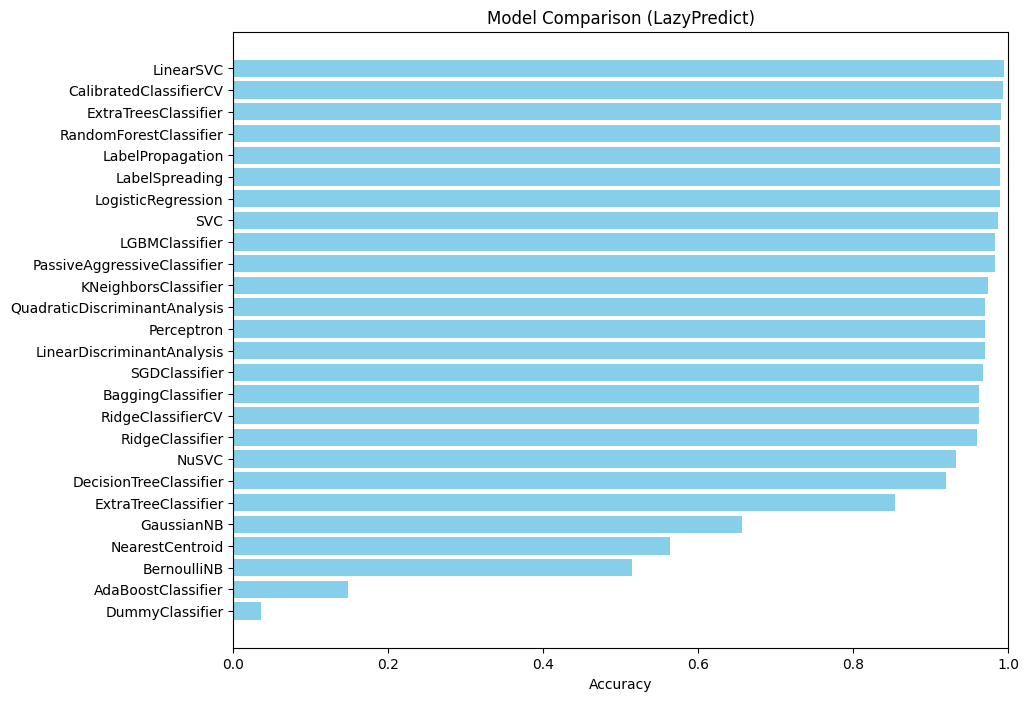

In [44]:
# Visualize models with there accuracy
plt.figure(figsize=(10,8))
plt.barh(models_sorted.index, models_sorted["Accuracy"], color="skyblue")
plt.xlabel("Accuracy")
plt.title("Model Comparison (LazyPredict)")
plt.xlim(0,1)
plt.show()

### Linear SVC Model

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

param_grid = {
    'C' : [.001, .01, .1, 1, 10, 100],
    'class_weight' : [None, 'balanced']
}

lsvc = LinearSVC()

grid_search_lsvc = GridSearchCV(
    estimator= lsvc,
    param_grid= param_grid,
    cv= 5,
    scoring= 'accuracy',
    verbose= 1,
    n_jobs= -1
)

# Traning
grid_search_lsvc.fit(X_train, y_train)

best_model_lsvc = grid_search_lsvc.best_estimator_

y_pred_lsvc = best_model_lsvc.predict(X_test)


print(f'Best Parameters : {grid_search_lsvc.best_params_}')
print(f'Best Cross-Validation Accuracy Score : {grid_search_lsvc.best_score_}')

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters : {'C': 100, 'class_weight': 'balanced'}
Best Cross-Validation Accuracy Score : 0.9916865110625942


 Accuarcy Is :  99.584
Precision Is :  0.996
Recall Is :  0.996
F1 Score Is :  0.996


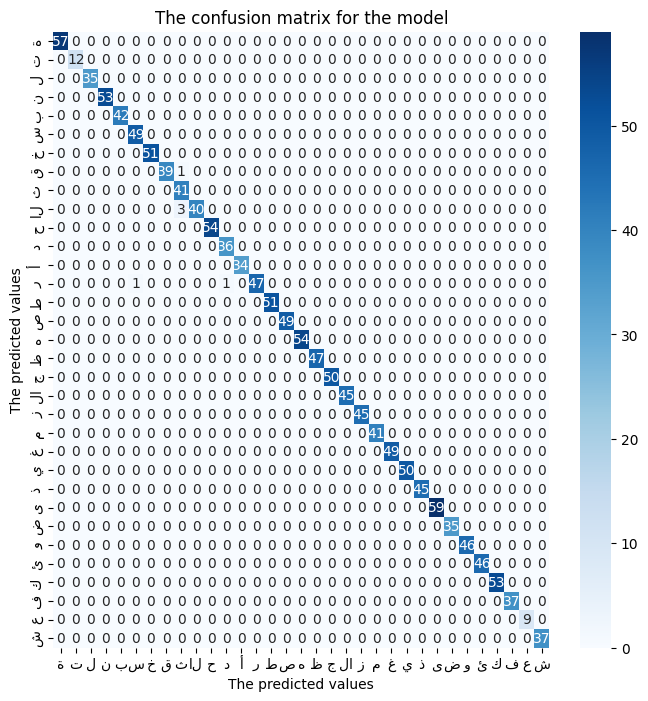

In [ ]:
# Evaluating
model_accuracy = accuracy_score(y_test, y_pred_lsvc)
model_confusion_matrix = confusion_matrix(y_test, y_pred_lsvc)
model_precision = precision_score(y_test, y_pred_lsvc, average= 'macro')
model_recall = recall_score(y_test, y_pred_lsvc, average= 'macro')
model_f1score = f1_score(y_test, y_pred_lsvc, average= 'macro')

print(f' Accuarcy Is : {model_accuracy * 100: .3f}')
print(f'Precision Is : {model_precision: .3f}')
print(f'Recall Is : {model_recall: .3f}')
print(f'F1 Score Is : {model_f1score: .3f}')

plt.figure(figsize= (8, 8))
sns.heatmap(model_confusion_matrix, annot= True,
            cmap= 'Blues',
            fmt = 'd',
            xticklabels = pd.unique(y),
            yticklabels = pd.unique(y))

plt.xlabel('The predicted values')
plt.ylabel('The predicted values')
plt.title('The confusion matrix for the model')
plt.show()


In [ ]:
import joblib
joblib.dump(best_model_lsvc, "LinearSVC_model.pkl")


['LinearSVC_model.pkl']

### SVC Model

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

param_grid = {
    'C' : [.001, .01, .1, 1, 10, 100],
    'class_weight' : [None, 'balanced'],
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma' : ['scale', 'auto']
}

svc = SVC()

grid_search_svc = GridSearchCV(
    estimator= svc,
    param_grid= param_grid,
    cv= 5,
    scoring= 'accuracy',
    verbose= 1,
    n_jobs= -1
)

# Traning
grid_search_svc.fit(X_train, y_train)

best_model_svc = grid_search_svc.best_estimator_

y_pred_svc = best_model_svc.predict(X_test)


print(f'Best Parameters : {grid_search_svc.best_params_}')
print(f'Best Cross-Validation Accuracy Score : {grid_search_svc.best_score_}')

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best Parameters : {'C': 100, 'class_weight': None, 'gamma': 'scale', 'kernel': 'rbf'}
Best Cross-Validation Accuracy Score : 0.9954967851328336


 Accuarcy Is :  99.515
Precision Is :  0.995
Recall Is :  0.995
F1 Score Is :  0.995


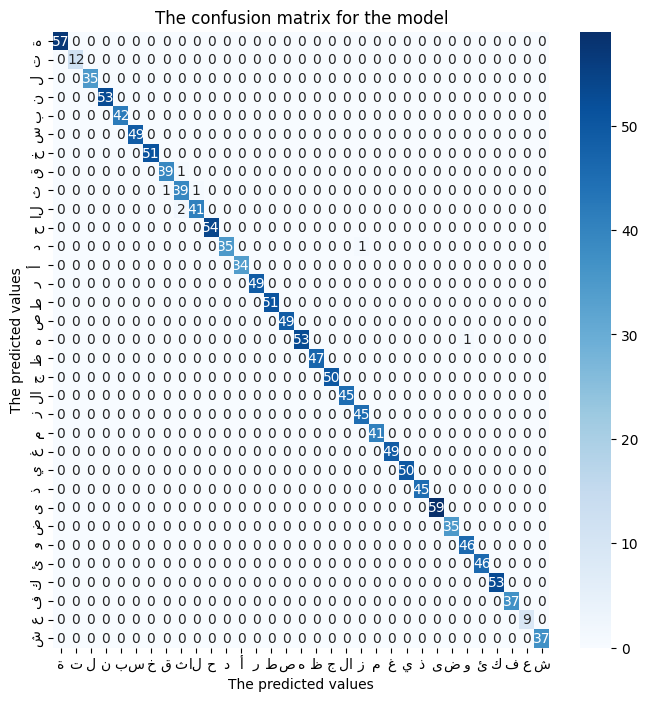

In [ ]:
# Evaluating
model_accuracy = accuracy_score(y_test, y_pred_svc)
model_confusion_matrix = confusion_matrix(y_test, y_pred_svc)
model_precision = precision_score(y_test, y_pred_svc, average= 'macro')
model_recall = recall_score(y_test, y_pred_svc, average= 'macro')
model_f1score = f1_score(y_test, y_pred_svc, average= 'macro')

print(f' Accuarcy Is : {model_accuracy * 100: .3f}')
print(f'Precision Is : {model_precision: .3f}')
print(f'Recall Is : {model_recall: .3f}')
print(f'F1 Score Is : {model_f1score: .3f}')

plt.figure(figsize= (8, 8))
sns.heatmap(model_confusion_matrix, annot= True,
            cmap= 'Blues',
            fmt = 'd',
            xticklabels = pd.unique(y),
            yticklabels = pd.unique(y))

plt.xlabel('The predicted values')
plt.ylabel('The predicted values')
plt.title('The confusion matrix for the model')
plt.show()


In [ ]:
joblib.dump(best_model_svc, "SVC_model.pkl")

['SVC_model.pkl']

### Logistic Regression Model

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', None],  # penalty term

    # inverse of regularization strength (how much the model will be effected by every sample)
    # C is big  that means the the model is care a lot about every training sample (the model is underfitting the data and i am trying to fix this),
    # but if C is too small (that means that i will care a little bit for every training sample) i want to reduce overfitting in the model
    'C': np.logspace(-3, 3, 20),

    'max_iter': [1000],
    'l1_ratio': [0.1, 0.5, 0.9, None],            # the ratio between L1, and L2 when using elasticent
    'class_weight': [None, 'balanced'],
}

LR = LogisticRegression()

randomized_search_LR = RandomizedSearchCV(
    estimator= LR,
    param_distributions= param_grid,
    cv= 5,
    scoring= 'accuracy',
    verbose= 1,
    n_jobs= -1
)

# Traning
randomized_search_LR.fit(X_train, y_train)

best_model_LR = randomized_search_LR.best_estimator_

y_pred_LR = best_model_LR.predict(X_test)


print(f'Best Parameters : {randomized_search_LR.best_params_}')
print(f'Best Cross-Validation Accuracy Score : {randomized_search_LR.best_score_}')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters : {'penalty': 'l2', 'max_iter': 1000, 'l1_ratio': None, 'class_weight': None, 'C': np.float64(233.57214690901213)}
Best Cross-Validation Accuracy Score : 0.9909938703699537


 Accuarcy Is :  99.446
Precision Is :  0.994
Recall Is :  0.994
F1 Score Is :  0.994


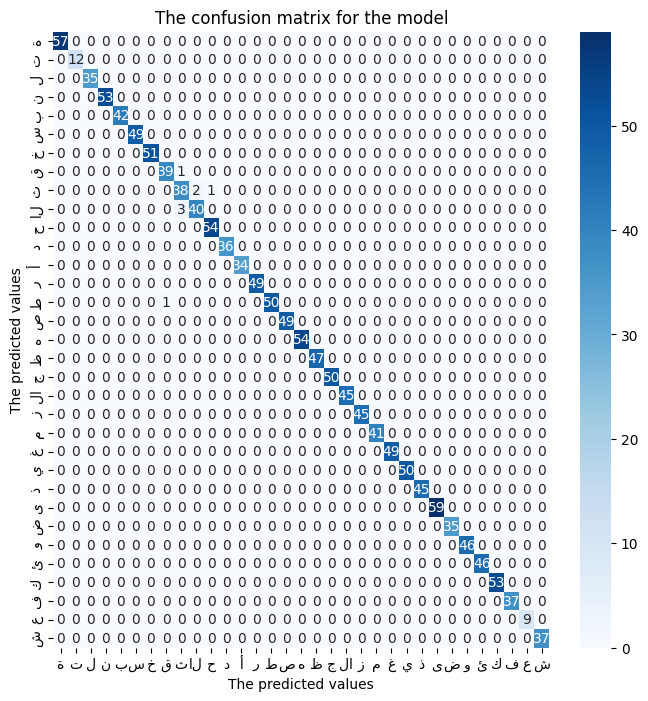

In [ ]:
# Evaluating
model_accuracy = accuracy_score(y_test, y_pred_LR)
model_confusion_matrix = confusion_matrix(y_test, y_pred_LR)
model_precision = precision_score(y_test, y_pred_LR, average= 'macro')
model_recall = recall_score(y_test, y_pred_LR, average= 'macro')
model_f1score = f1_score(y_test, y_pred_LR, average= 'macro')

print(f' Accuarcy Is : {model_accuracy * 100: .3f}')
print(f'Precision Is : {model_precision: .3f}')
print(f'Recall Is : {model_recall: .3f}')
print(f'F1 Score Is : {model_f1score: .3f}')

plt.figure(figsize= (8, 8))
sns.heatmap(model_confusion_matrix, annot= True,
            cmap= 'Blues',
            fmt = 'd',
            xticklabels = pd.unique(y),
            yticklabels = pd.unique(y))

plt.xlabel('The predicted values')
plt.ylabel('The predicted values')
plt.title('The confusion matrix for the model')
plt.show()


In [ ]:
joblib.dump(best_model_LR, 'Logistic_Regression_model.pkl')

['Logistic_Regression_model.pkl']

### Random Forest Calssifier Model

In [45]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import numpy as np

param_grid = {

    'n_estimators': [100, 300, 500],                               # number of trees

    'max_depth': [None, 10],                                       # max depth for every tree

    # use bootstrap or not (bootstrap: is to train every tree with random samples have the same rows of the acual data)
    # that means there is some samples the tree couldn't to see it and some samples is trained on it more than one
    'bootstrap': [False],                                          # we didn't use it here because the data is small (less than 10000), and we want the trees to see all samples


    # 'criterion': ['gini', 'entropy'],
    'class_weight': ['balanced', None]
}

RFC = RandomForestClassifier(random_state= 42)

randomized_search_RFC = RandomizedSearchCV(
    estimator= RFC,
    param_distributions= param_grid,
    n_iter= 50,
    cv= 5,
    scoring= 'accuracy',
    verbose= 1,
    n_jobs= -1
)


randomized_search_RFC.fit(X_train, y_train)

best_model_RFC = randomized_search_RFC.best_estimator_

y_pred_RFC = best_model_RFC.predict(X_test)

print(f'Best Parameters : {randomized_search_RFC.best_params_}')
print(f'Best Cross-Validation Accuracy Score : {randomized_search_RFC.best_score_}')

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters : {'n_estimators': 500, 'max_depth': None, 'class_weight': 'balanced', 'bootstrap': False}
Best Cross-Validation Accuracy Score : 0.9851058242739352


 Accuarcy Is :  98.961
Precision Is :  0.990
Recall Is :  0.988
F1 Score Is :  0.989


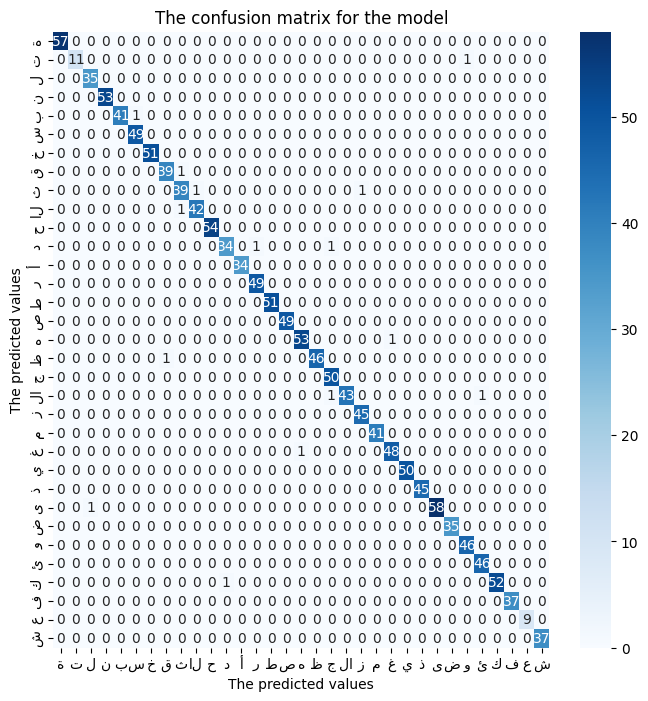

In [46]:
# Evaluating
model_accuracy = accuracy_score(y_test, y_pred_RFC)
model_confusion_matrix = confusion_matrix(y_test, y_pred_RFC)
model_precision = precision_score(y_test, y_pred_RFC, average= 'macro')
model_recall = recall_score(y_test, y_pred_RFC, average= 'macro')
model_f1score = f1_score(y_test, y_pred_RFC, average= 'macro')

print(f' Accuarcy Is : {model_accuracy * 100: .3f}')
print(f'Precision Is : {model_precision: .3f}')
print(f'Recall Is : {model_recall: .3f}')
print(f'F1 Score Is : {model_f1score: .3f}')

plt.figure(figsize= (8, 8))
sns.heatmap(model_confusion_matrix, annot= True,
            cmap= 'Blues',
            fmt = 'd',
            xticklabels = pd.unique(y),
            yticklabels = pd.unique(y))

plt.xlabel('The predicted values')
plt.ylabel('The predicted values')
plt.title('The confusion matrix for the model')
plt.show()

In [50]:
import joblib
joblib.dump(best_model_RFC, 'RFC_model.pkl')

['RFC_model.pkl']